In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from pandas import Series, DataFrame


df = pd.read_csv("apm_data_cont_v3_11_21_changed.csv")
df=df.dropna()

In [4]:
df.head()

,Date,Users,Pageview,Sessions,Bounce Rate,Unique Pageview,Exit Rate,Organic Search,Conversions,Y variable,...,Google,Googleads,HC360,Nextdoor,Others,Powertochoose,Realtor,Yahoo,Youtube,Zillow-group
0,1-Jun,15,16,4,11.538462,15,19.230769,1,0,0,...,11,0,0,0,0,0,0,0,0,0
1,2-Jun,23,41,10,20.714286,23,26.275510,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,3-Jun,370,569,142,7.323703,408,28.680262,23,2,0,...,55,0,0,0,3,181,0,3,0,0
3,4-Jun,588,817,215,10.221046,648,31.313901,39,3,0,...,128,0,0,0,3,254,0,2,0,0
4,5-Jun,396,530,170,10.426934,436,36.726891,26,2,0,...,119,0,0,0,1,117,0,3,0,0


In [3]:
df.dtypes

Date                                                                      object
Sum of User                                                                int64
Sum of Pageview                                                            int64
Sum of Session                                                             int64
Average of BounceRate                                                    float64
Sum of UniquePageview                                                      int64
Average of ExitRate                                                      float64
Sum of OrganicSearch                                                       int64
Sum of Conversions                                                         int64
Y variable                                                                 int64
Average of Session dur                                                   float64
Average of Time on page                                                  float64
Month                       

In [4]:
df.shape

(153, 38)

# Distribution

In [5]:
# A for loop to show you all the .describe simple statistic distribution of the variables

for col in df.columns: 
    print(col)
    print('   ')
    print(df[col].describe())
    print('-----------------------------------------')


Date
   
count        153
unique       153
top       20-Oct
freq           1
Name: Date, dtype: object
-----------------------------------------
Sum of User
   
count     153.000000
mean     2247.699346
std       870.574954
min        15.000000
25%      1689.000000
50%      2163.000000
75%      2679.000000
max      5015.000000
Name: Sum of User, dtype: float64
-----------------------------------------
Sum of Pageview
   
count     153.000000
mean     2975.084967
std      1135.053418
min        16.000000
25%      2282.000000
50%      2956.000000
75%      3613.000000
max      6479.000000
Name: Sum of Pageview, dtype: float64
-----------------------------------------
Sum of Session
   
count     153.000000
mean     1268.869281
std       451.962180
min         4.000000
25%      1020.000000
50%      1217.000000
75%      1562.000000
max      2596.000000
Name: Sum of Session, dtype: float64
-----------------------------------------
Average of BounceRate
   
count    153.000000
mean      13.12

Date


C:\Users\aadia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


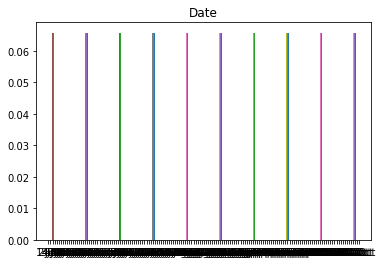

-----------------------------------------
Sum of User


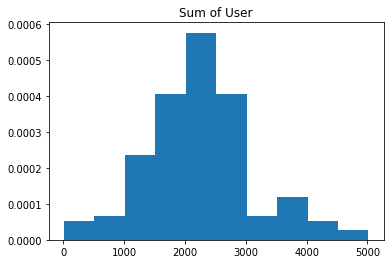

-----------------------------------------
Sum of Pageview


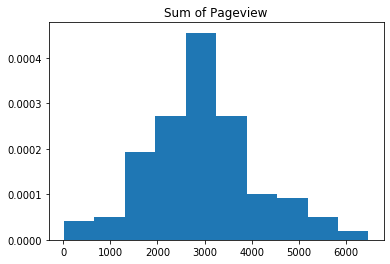

-----------------------------------------
Sum of Session


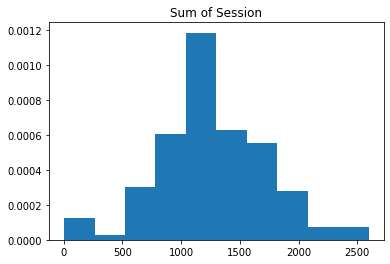

-----------------------------------------
Average of BounceRate


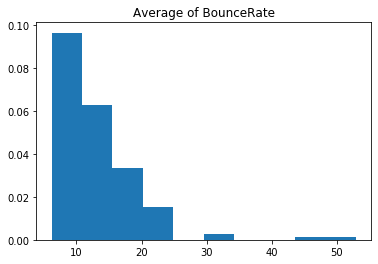

-----------------------------------------
Sum of UniquePageview


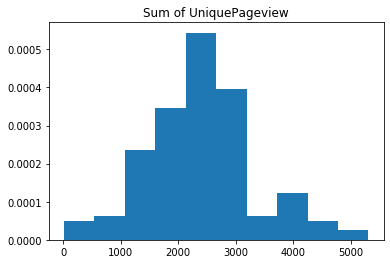

-----------------------------------------
Average of ExitRate


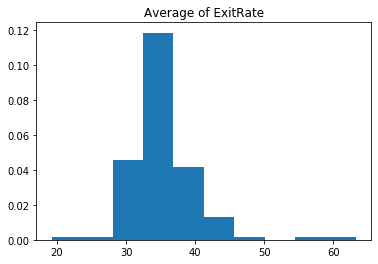

-----------------------------------------
Sum of OrganicSearch


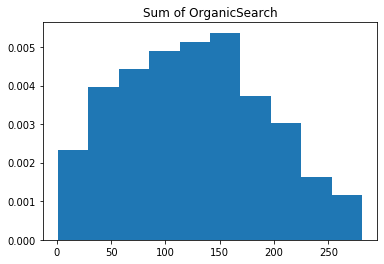

-----------------------------------------
Sum of Conversions


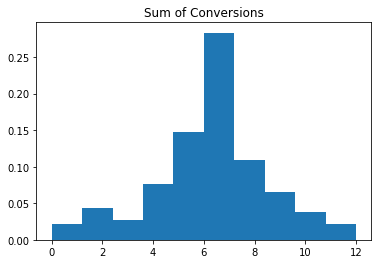

-----------------------------------------
Y variable


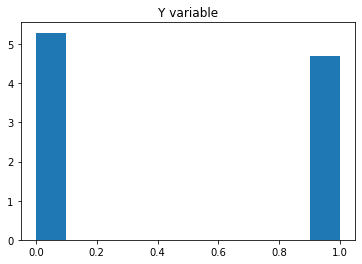

-----------------------------------------
Average of Session dur


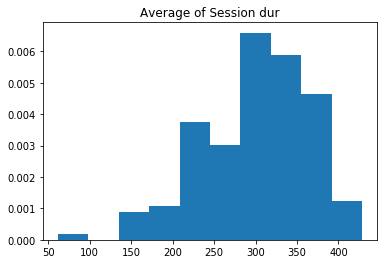

-----------------------------------------
Average of Time on page


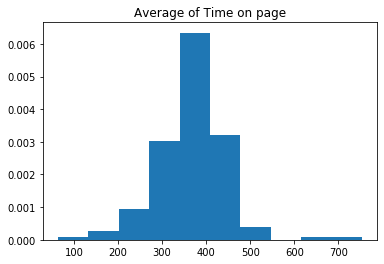

-----------------------------------------
Month


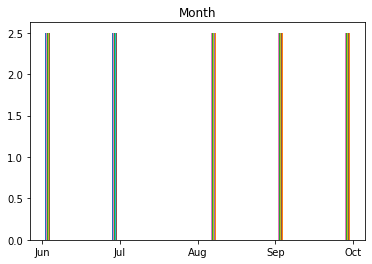

-----------------------------------------
Year


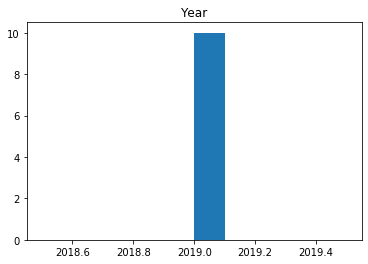

-----------------------------------------
Day


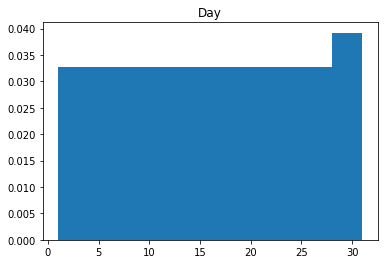

-----------------------------------------
Day of Week


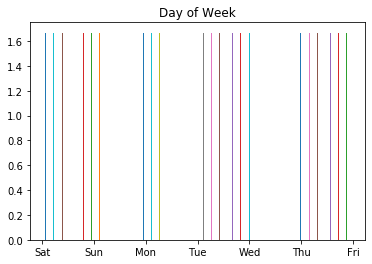

-----------------------------------------
(direct)


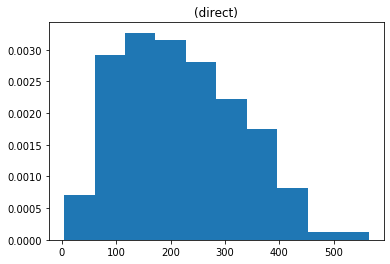

-----------------------------------------
(not set)


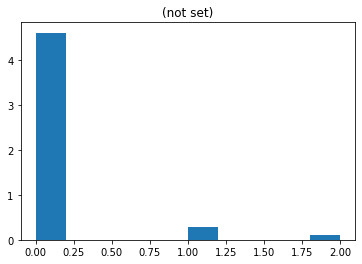

-----------------------------------------
Adroll


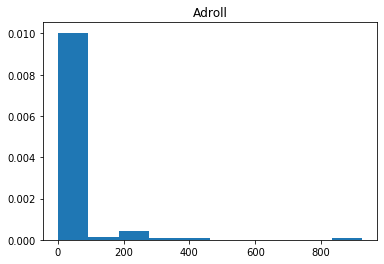

-----------------------------------------
Amazon


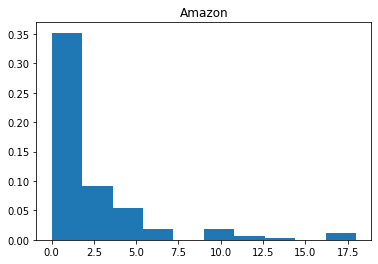

-----------------------------------------
amoselectric.com/electricity-service/residential-electricity-service/


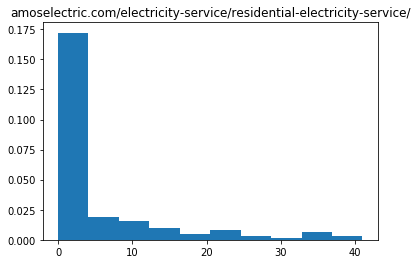

-----------------------------------------
Baidu


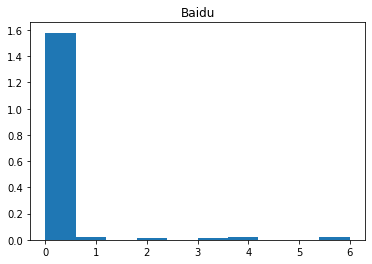

-----------------------------------------
Bing


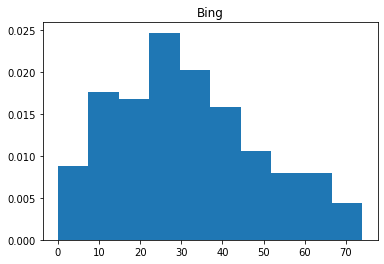

-----------------------------------------
Chariot-Energy


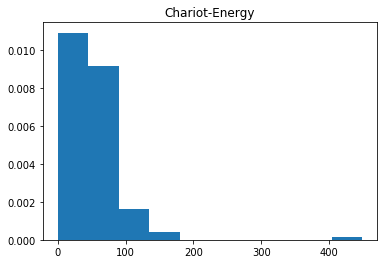

-----------------------------------------
Choozle


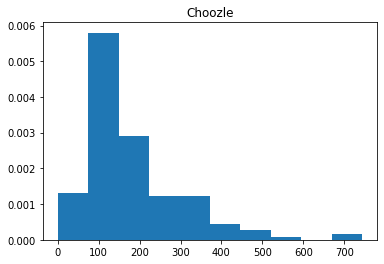

-----------------------------------------
Duckduckgo


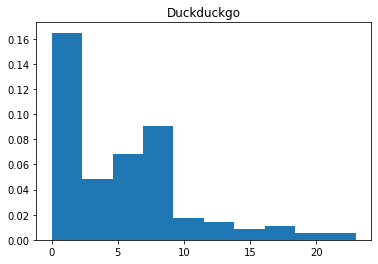

-----------------------------------------
Facebook


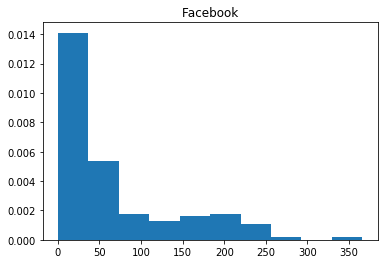

-----------------------------------------
GMB


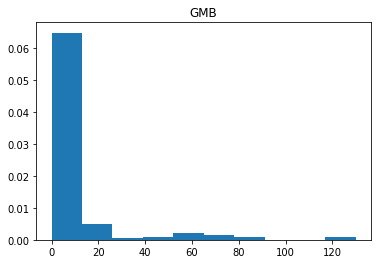

-----------------------------------------
Google


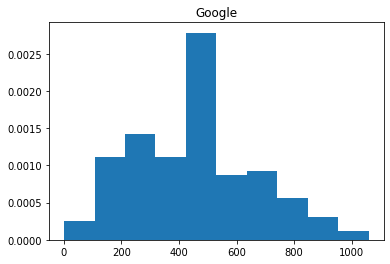

-----------------------------------------
Googleads


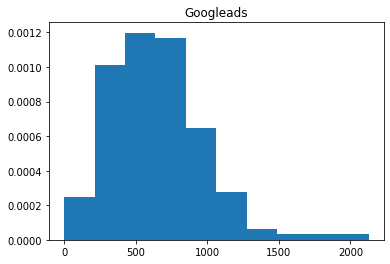

-----------------------------------------
HC360


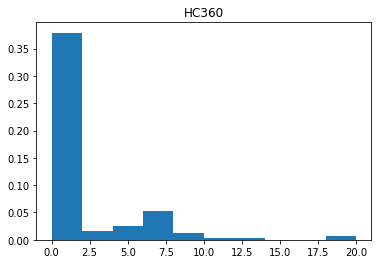

-----------------------------------------
Nextdoor


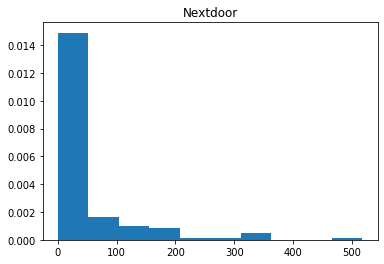

-----------------------------------------
Others


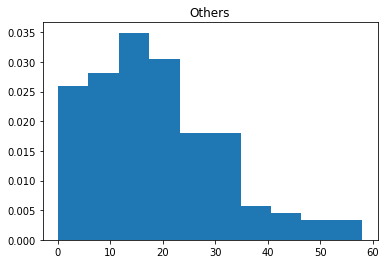

-----------------------------------------
Powertochoose


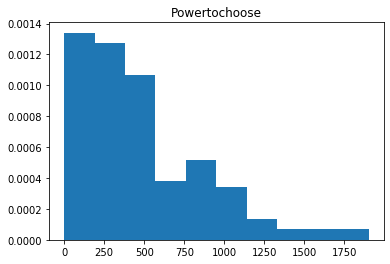

-----------------------------------------
Realtor


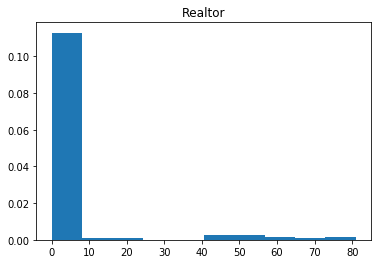

-----------------------------------------
Yahoo


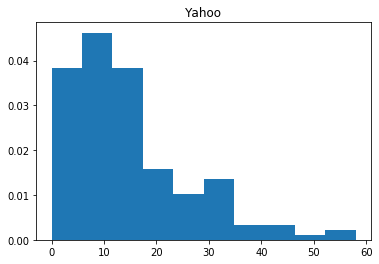

-----------------------------------------
Youtube


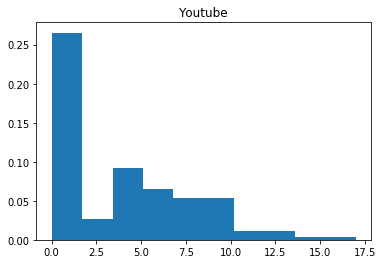

-----------------------------------------
Zillow-group


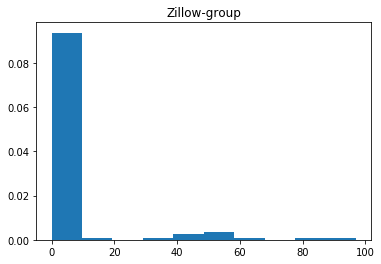

-----------------------------------------


In [6]:
# A for loop to show the distribution of all variables, the num of bin is defaulted to 10 

for col in df.columns: 
    print(col)
    
    num_bins = 10
    plt.hist(df[col], num_bins, normed=1)
    plt.title(col)
    plt.show()
    print('-----------------------------------------')


We see that the behavioral variables with numeric values mostly follow a normal distribution.

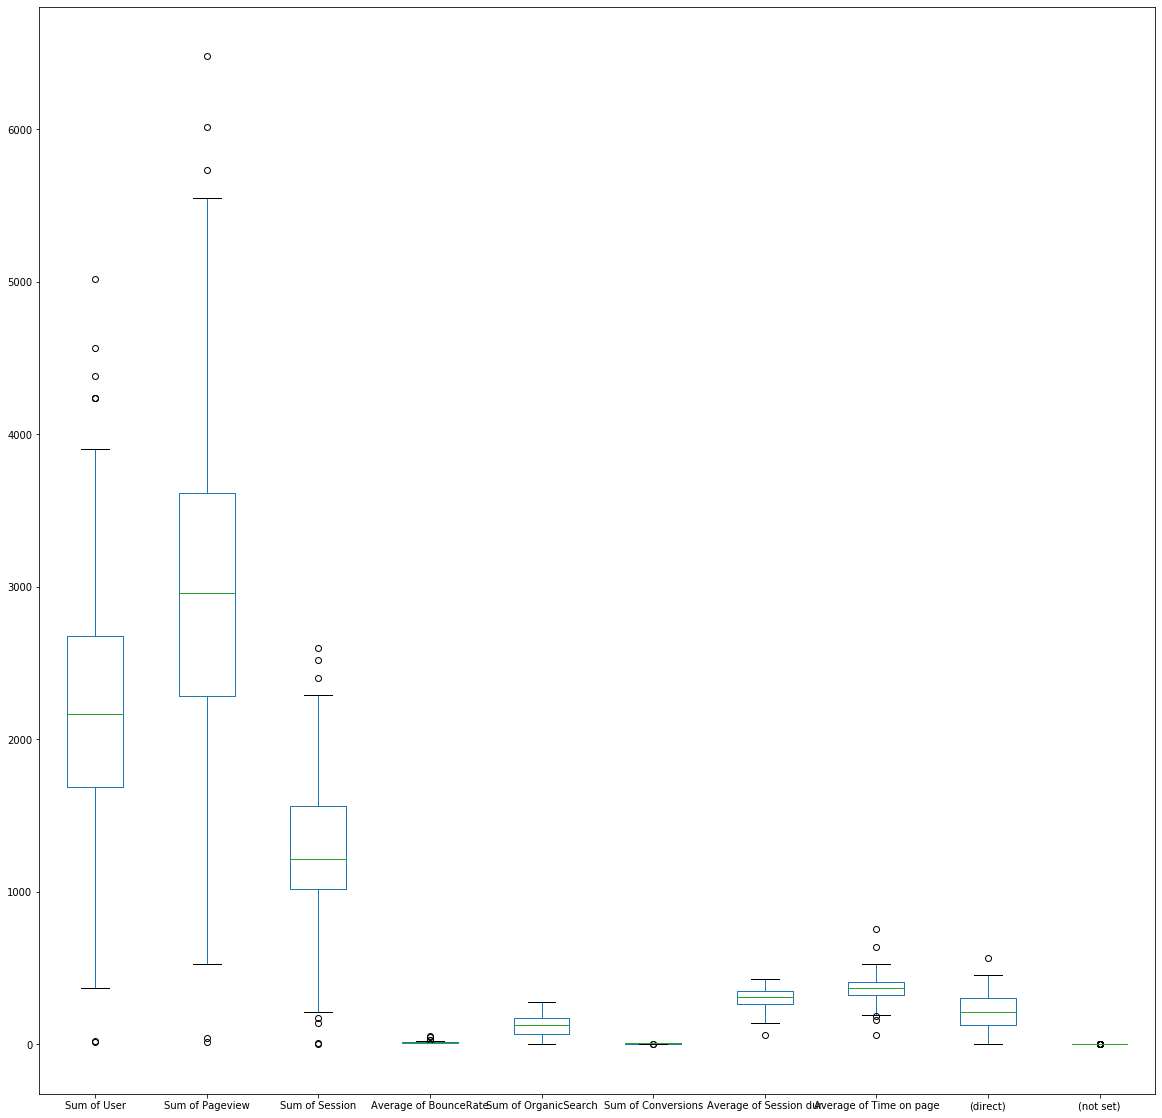

In [46]:
#Box plot visualization

data= df[['Sum of User', 'Sum of Pageview', 'Sum of Session',
       'Average of BounceRate',
       'Sum of OrganicSearch', 'Sum of Conversions',
       'Average of Session dur', 'Average of Time on page','(direct)', '(not set)']]
data.plot(kind='box',figsize=(20,20))

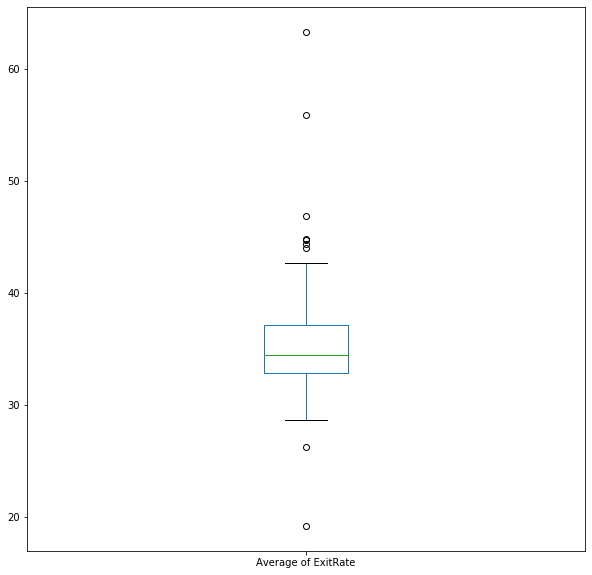

In [15]:
# for smaller range graph
hue= df[['Average of ExitRate']]
hue.plot(kind='box',figsize=(10,10))

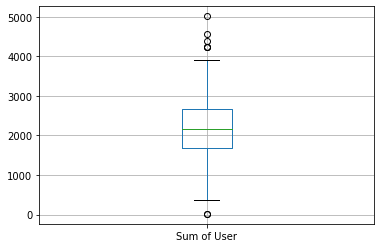

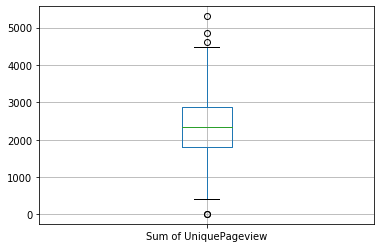

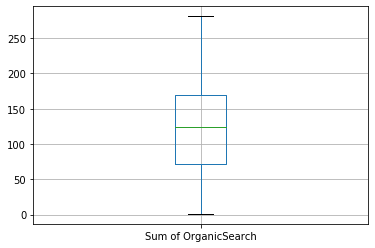

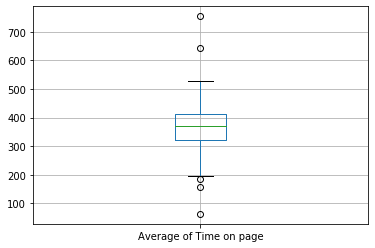

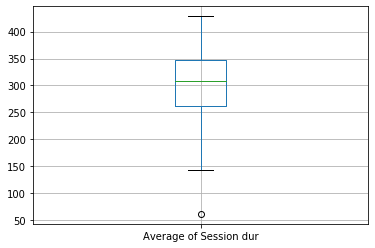

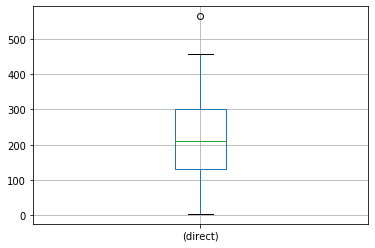

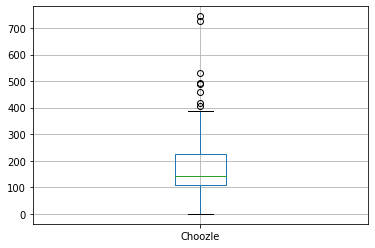

In [16]:
#Each boxplot gets its own graph
for column in data:
    plt.figure()
    data.boxplot([column])

# Correlation

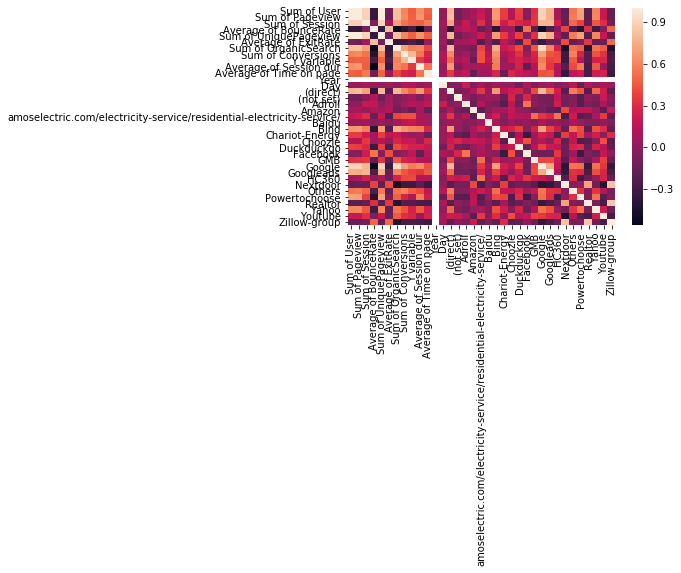

In [9]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)